✅ XOR-2: Accuracy = 1.00 | Hidden: (3,) | Solver: lbfgs
✅ XOR-3: Accuracy = 1.00 | Hidden: (5,) | Solver: lbfgs
✅ XOR-4: Accuracy = 1.00 | Hidden: (5,) | Solver: lbfgs
✅ XOR-5: Accuracy = 1.00 | Hidden: (10, 6) | Solver: lbfgs
✅ XOR-6: Accuracy = 1.00 | Hidden: (10, 6) | Solver: lbfgs
✅ XOR-7: Accuracy = 1.00 | Hidden: (10, 6) | Solver: lbfgs
✅ XOR-8: Accuracy = 1.00 | Hidden: (20, 20) | Solver: lbfgs
✅ XOR-9: Accuracy = 1.00 | Hidden: (20, 20) | Solver: lbfgs
✅ XOR-10: Accuracy = 1.00 | Hidden: (30, 20) | Solver: lbfgs
Iteration 1, loss = 0.69613218
Iteration 2, loss = 0.69419714
Iteration 3, loss = 0.69305147
Iteration 4, loss = 0.69077004
Iteration 5, loss = 0.68469707
Iteration 6, loss = 0.66405343
Iteration 7, loss = 0.62243061
Iteration 8, loss = 0.56309176
Iteration 9, loss = 0.49555230
Iteration 10, loss = 0.43542649
Iteration 11, loss = 0.37693136
Iteration 12, loss = 0.32843068
Iteration 13, loss = 0.27194072
Iteration 14, loss = 0.22794530
Iteration 15, loss = 0.19030695
Ite

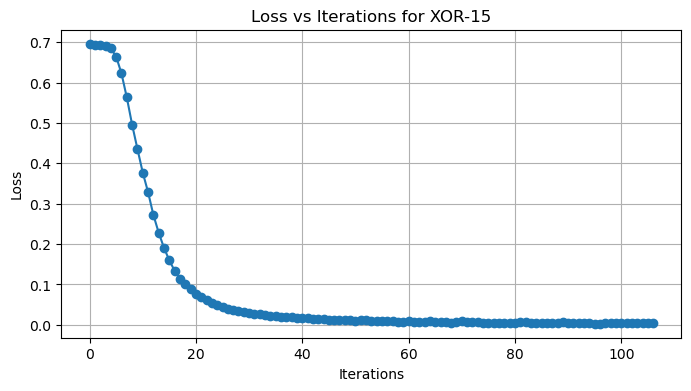

In [72]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# model parameters for each XOR size
params = {
    2: {'hidden_layer_sizes': (3,), 'activation': 'tanh', 'solver': 'lbfgs', 'max_iter': 2000},
    3: {'hidden_layer_sizes': (5,), 'activation': 'tanh', 'solver': 'lbfgs', 'max_iter': 2000},
    4: {'hidden_layer_sizes': (5,), 'activation': 'tanh', 'solver': 'lbfgs', 'max_iter': 2500},
    5: {'hidden_layer_sizes': (10,6), 'activation': 'tanh', 'solver': 'lbfgs', 'max_iter': 4000},
    6: {'hidden_layer_sizes': (10,6), 'activation': 'tanh', 'solver': 'lbfgs', 'max_iter': 4500},
    7: {'hidden_layer_sizes': (10,6), 'activation': 'tanh', 'solver': 'lbfgs', 'max_iter': 5000},
    8: {'hidden_layer_sizes': (20,20), 'activation': 'relu', 'solver': 'lbfgs', 'max_iter': 5000},
    9: {'hidden_layer_sizes': (20,20), 'activation': 'relu', 'solver': 'lbfgs', 'max_iter': 5500},
    10:{'hidden_layer_sizes': (30,20), 'activation': 'relu', 'solver': 'lbfgs', 'max_iter': 6000},
    15:{'hidden_layer_sizes': (80,60), 'activation': 'relu', 'solver': 'adam', 'max_iter': 10000}

}

def load_data(n):
    df = pd.read_csv(f"data/xor_{n}.csv")
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

def build_model(cfg):
    return MLPClassifier(
        hidden_layer_sizes=cfg['hidden_layer_sizes'],
        activation=cfg['activation'],
        solver=cfg['solver'],
        max_iter=cfg['max_iter'],
        random_state=42,
        verbose=True,
        tol=1e-6
        
    )

def train_and_evaluate(n, cfg):
    X, y = load_data(n)
    model = build_model(cfg)
    model.fit(X, y)
    preds = model.predict(X)
    acc = accuracy_score(y, preds)
    print(f"✅ XOR-{n}: Accuracy = {acc:.2f} | Hidden: {cfg['hidden_layer_sizes']} | Solver: {cfg['solver']}")
    return model

def plot_loss(model, n):
    if hasattr(model, 'loss_curve_'):
        plt.figure(figsize=(8,4))
        plt.plot(model.loss_curve_, marker='o')
        plt.title(f"Loss vs Iterations for XOR-{n}")
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()

def main():
   for n in sorted(params.keys()):
        cfg = params[n]
        model = train_and_evaluate(n, cfg)
        plot_loss(model, n)

if __name__ == "__main__":
    main()
